# Description of file:

This file aims to investigate the difference in variaiton of fractal dimension with threshold parameter of `fractal_dimension()` method for images of fractals of both full and half resolution.
## Functions:

### `fractal_dimension(Z, threshold = 0.9)`:
This uses two arguments: `Z` = one of the normalised image, and `threshold` = the threhsold value for conversion from pixel intensities to binary arrays. This returns the coefficient of the graph in of Minkowski-Bouligand graph and `x` and `y` values (which are the log(s) and log(N(s)) from:

$$\ln[N(s)] = \textrm{ - Dimension}\: * \: \ln(s) + h(s) $$


### `linreg_score(x1,y1)`:
Provides the R^2 fit of the plot above using the `sklearn` module.

### `thresholds(fname, thresh = 0.9)`:
Calculates the fractal dimension for a range of threshold values, created by `np.arange(0,0.9, 0.02)`. Returns distionary of fractal dimension values, from `fractal_dimension()` method.

### `clean(diction)`:
Cleans the dictionary from nan values.




In [36]:
import scipy.misc
import numpy as np
from sklearn.linear_model import LinearRegression
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import csv
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot, transforms
import math

In [70]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 6]

In [40]:

def fractal_dimension(Z, threshold=0.9):

    # Only for 2d image

    assert(len(Z.shape) == 2)

    
    def boxcount(Z, k):
        S = np.add.reduceat(
            np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0),
                               np.arange(0, Z.shape[1], k), axis=1)

        # We count non-empty (0) and non-full boxes (k*k)
        return len(np.where((S > 0) & (S < k*k))[0])
    


    # Transform Z into a binary array
    Z = (Z <= threshold)
    # Minimal dimension of image
    p = min(Z.shape)
    
    # Greatest power of 2 less than or equal to p
    n = 2**np.floor(np.log(p)/np.log(2))
    
    # Extract the exponent
    n = int(np.log(n)/np.log(2))

    sizes = 2**np.arange(n, 0, -1)
    sizes = list(sizes)
    sizes = sizes[1:]

    # Actual box counting with decreasing size
    counts = []
    for size in sizes:
        counts.append(boxcount(Z, size))

    # Fit the successive log(sizes) with log (counts)
    
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    x = np.log(sizes)
    y = np.log(counts)
    
    
    return -coeffs[0], x, y



In [41]:
def start(filename, pixel_threshold = 0.9):
    I = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    I = I/256
    coeff, x, y  = fractal_dimension(I, pixel_threshold)
    return coeff, x, y

In [42]:

def clean(diction):
    # clean diction argument from nan values 
    
    for key in list(diction.keys()):
        if math.isnan(diction[key]):
            del diction[key]
    return diction
            
def thresholds(file_dir):
    thresholds = np.arange(0,0.9, 0.02).tolist()
    thresholds = [round(i,2) for i in thresholds ]
    thresholds = thresholds[1:]
    
    # dictionary of fractal dimension values
    thresh_dict = {}
    for i in thresholds:
        coeff, x, y  = start(file_dir, i)
        thresh_dict[i] = coeff
        
    # clean the threshold dictionary
    thresh_dict = clean(thresh_dict)
    return thresh_dict


# Visualisation of half resolution benchmark fractals
## Threshold vs fractal dimension plots. 

In [66]:
files = {"GreatBritain.png", "SierpinskiTriangleHD.png", "Douady_rabbitNew.png",  "JuliaSetNew.png", "irelandcoastNew.png"}
files_lst = list(files)
files = dict.fromkeys(files, 0)

for file in files:
    curr_file = file[:-4] + "50" + file[-4:]
    files[file] = thresholds("./SelfSimilarFractals/resolutions/{}".format(curr_file))


In [67]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 4]

In [68]:
titles = [  "Coast of Ireland","Coast of Great Britain", "Sierpinski Triangle", "Julia Set","Douady Rabbit"]

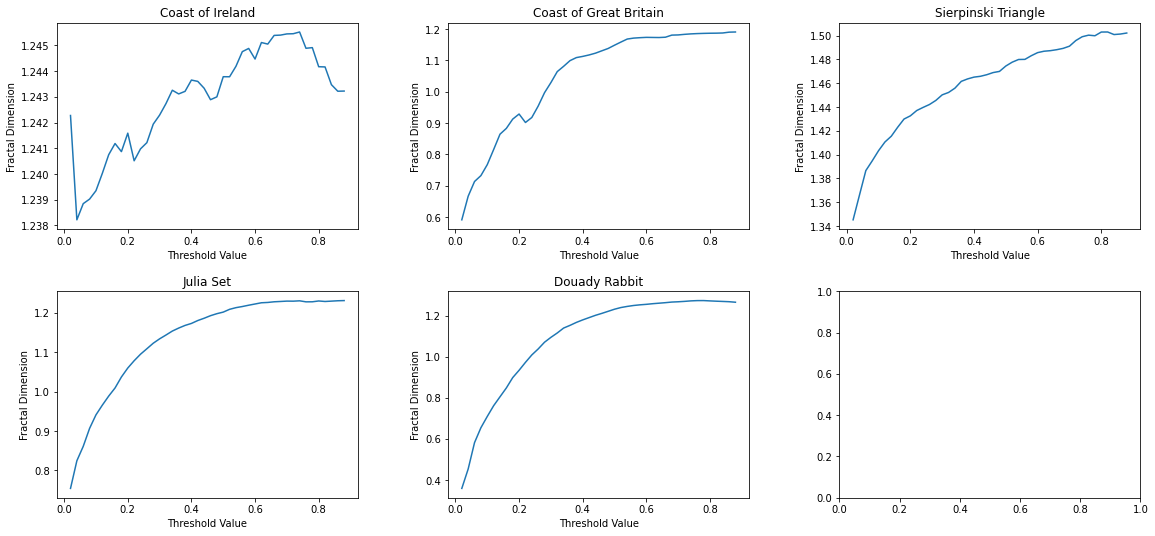

In [71]:
fig, axs = plt.subplots(2,3)
fig.tight_layout()
column_count = 0
row_count = 0
title_count = 0
for file in files_lst:

    if column_count % 3 ==0 and column_count != 0:
        row_count += 1
        column_count = 0
    axs[row_count , column_count].plot(files[file].keys(), files[file].values())
    axs[row_count , column_count].title.set_text(titles[title_count])
    axs[row_count , column_count].set_xlabel(xlabel = 'Threshold Value')
    axs[row_count , column_count].set_ylabel(ylabel = 'Fractal Dimension')
    column_count +=1
    
    title_count +=1 
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 1.2,    # the right side of the subplots of the figure
bottom = 0.1,   # the bottom of the subplots of the figure
top = 1.2 ,     # the top of the subplots of the figure
wspace = 0.3  , # the amount of width reserved for blank space between subplots
hspace = 0.3  )

# Visualisation of full resolution benchmark fractals.
##  Threshold vs fractal dimension plots.


In [54]:
titles = [  "Coast of Ireland","Coast of Great Britain", "Sierpinski Triangle", "Julia Set","Douady Rabbit"]

In [55]:
files = {"GreatBritain.png", "SierpinskiTriangleHD.png", "Douady_rabbitNew.png",  "JuliaSetNew.png", "irelandcoastNew.png"}
files_lst = list(files)
files = dict.fromkeys(files, 0)

for file in files:
    curr_file = file[:-4] + "50" + file[-4:]
    files[file] = thresholds("./SelfSimilarFractals/{}".format(file))

In [56]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 6]

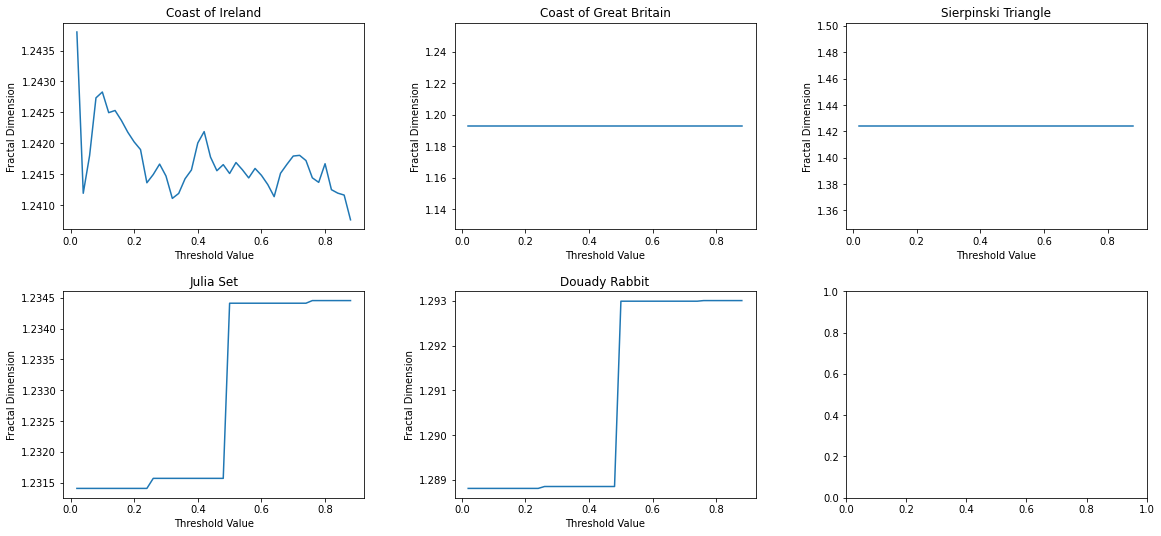

In [57]:
fig, axs = plt.subplots(2,3)
fig.tight_layout()
column_count = 0
row_count = 0
title_count = 0
for file in files_lst:

    if column_count % 3 ==0 and column_count != 0:
        row_count += 1
        column_count = 0
    axs[row_count , column_count].plot(files[file].keys(), files[file].values())
    axs[row_count , column_count].title.set_text(titles[title_count])
    axs[row_count , column_count].set_xlabel(xlabel = 'Threshold Value')
    axs[row_count , column_count].set_ylabel(ylabel = 'Fractal Dimension')
    column_count +=1
    
    title_count +=1 
plt.subplots_adjust(left  = 0.125,  # the left side of the subplots of the figure
right = 1.2,    # the right side of the subplots of the figure
bottom = 0.1,   # the bottom of the subplots of the figure
top = 1.2 ,     # the top of the subplots of the figure
wspace = 0.3  , # the amount of width reserved for blank space between subplots
hspace = 0.3  )